In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

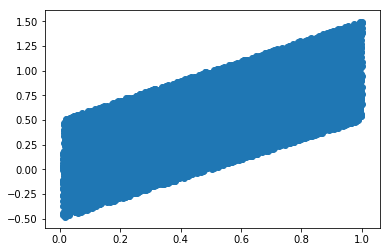

In [2]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

Assignment 5
1. Create and fit a Linear Regression Model
Calculate the Training error and Testing error using sklearn with a .50 split

In [4]:
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
X_train, X_test , y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.5, random_state = 1)

ML  = linear_model.LinearRegression()
ML.fit(X_train,y_train)

predtrain = ML.predict(X_train)
print('the training error is:' ,mean_squared_error(y_train, predtrain))

predtest = ML.predict(X_test)
print('the test error is: ', mean_squared_error(y_test, predtest))


the training error is: 0.0833385727281
the test error is:  0.0849722787711


2. Repeat #1 for a Ridge Regression

In [7]:
MR = linear_model.Ridge(alpha = 0.5)
MR.fit(X_train,y_train)

predtrainR = MR.predict(X_train)
print('the training error is:' ,mean_squared_error(y_train, predtrainR))

predtestR = MR.predict(X_test)
print('the test error is: ', mean_squared_error(y_test, predtestR))





the training error is: 0.0833386924379
the test error is:  0.0849775236424


3. Vary the split size from .01 to .99 with at least 10 values (the more the merrier!). 
Plot the resulting Training error and Testing error vs. split size. 
Create separate plots for Linear and Ridge¶

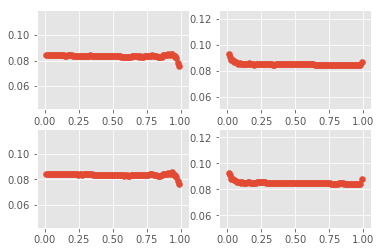

In [50]:

split = np.linspace(0.01,0.99,100)
ErrortrainL = []
ErrortestL =  []
ErrortrainR = []
ErrortestR =  []


for i in split:

    X_train, X_test , y_train, y_test = cross_validation.train_test_split(x, y, test_size=i, random_state = 1)
    ML.fit(X_train,y_train)
    predtrain = ML.predict(X_train)
    predtest = ML.predict(X_test)
    ErrortrainL.append(mean_squared_error(y_train, predtrain))
    ErrortestL.append(mean_squared_error(y_test, predtest)) 
    
    MR.fit(X_train,y_train)
    predtrainR = MR.predict(X_train)
    predtestR = MR.predict(X_test)
    ErrortrainR.append(mean_squared_error(y_train, predtrainR))
    ErrortestR.append(mean_squared_error(y_test, predtestR))
    

plt.style.use('ggplot')

fig, ax = plt.subplots(2,2) 
ax[0,0].scatter(split,ErrortrainL) 
ax[0,1].scatter(split,ErrortestL) 
ax[1,0].scatter(split,ErrortrainR) 
ax[1,1].scatter(split,ErrortestR)

plt.show()

 
    
    
    









4. Chose an ideal split size based on the previous plot for Ridge.
Vary the Ridge parameter alpha from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the alpha parameter's stiffness.

0.910808080808
0.99
0.005
0.005


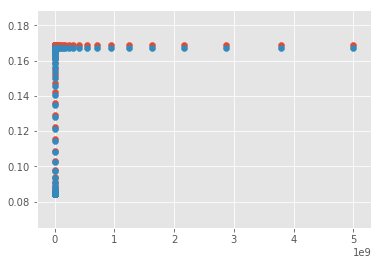

In [58]:
'locate the minimum test error for the ridge regression'
minIndextest = ErrortestR.index(min(ErrortestR))
print(split[minIndextest])
minIndextrain = ErrortrainR.index(min(ErrortrainR))
print(split[minIndextrain])

'use 91%'
X_train, X_test , y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.91, random_state = 1)

alphas = 10**np.linspace(10,-2,100)*0.5

RidgeErrortrain = []
RidgeErrortest  = []

for i in alphas:
    
    MR = linear_model.Ridge(alpha = i)
    MR.fit(X_train,y_train)
    predtrainR = MR.predict(X_train)
    RidgeErrortrain.append(mean_squared_error(y_train, predtrainR))
    predtestR = MR.predict(X_test)
    RidgeErrortest.append(mean_squared_error(y_test, predtestR))
    
print(alphas[RidgeErrortrain.index(min(RidgeErrortrain))])
print(alphas[RidgeErrortest.index(min(RidgeErrortest))])

plt.scatter(alphas,RidgeErrortrain)

plt.scatter(alphas,RidgeErrortest)

    
    


 Based on a test size of 91%, the optimal ridge parameter is 0.005, very close to zero which means that the ridge regression gives similar results to a linear regression